In [85]:
using Random;
using Distributions;
using Plots;
using AverageShiftedHistograms;

In [86]:
Random.seed!(123)

TaskLocalRNG()

In [87]:
function central_limit_theorem(N::Integer, d::Any)
    x = rand(d, N)
    μ = mean(x[1:N])
    σ = var(x[1:N])
    return x, μ, σ
end

central_limit_theorem (generic function with 1 method)

In [88]:
n = 120
dist = Logistic() #Arcsine, Beta, Cauchy, Chi2, Exponential, Gamma, Laplace, Logistic, Normal, Pareto, StudentT, Uniform, Weibull, Cosine
M = 5

5

In [89]:
x, μ, σ = central_limit_theorem(n, dist)

([0.08490615315611987, 0.3507801788128583, 2.099748151900836, -1.4441294172557984, 0.10273984320148369, -0.4448401047197821, -3.05929193659322, 2.639378062571662, 0.3250725922714852, -0.720704440231601  …  -0.9739875286786582, -0.9603348187484426, 1.3156851398074445, 0.7222728092327703, 0.9728845423738861, -5.169926646866451, -0.17250479735484778, -4.839990599841662, -2.640703217708844, -3.018725458572638], -0.10718009546610933, 3.103166256983696)

In [90]:
#display("text/plain", x)
display("text/plain", μ)
display("text/plain", σ)
if (σ >= zero(σ))
    display("text/plain", "OK")
else
    display("text/plain", "FAIL")
end

-0.10718009546610933

3.103166256983696

"OK"

In [91]:
function get_normals(samples::Vector{Float64})
    means = zeros(0)
    vars = zeros(0)
    for i in 1:length(samples)
        append!(means, mean(samples[1:i]))
        if (i > 1)
            append!(vars, var(samples[1:i]))
        end
    end
    return means, vars
end

get_normals (generic function with 1 method)

In [92]:
means, vars = get_normals(x)

([0.08490615315611987, 0.21784316598448908, 0.8451448279566046, 0.2728262666535039, 0.23880898196309985, 0.12486746751595286, -0.33001244735678614, 0.04116136638426987, 0.07270705814951602, -0.006634091688595678  …  0.008375960285996985, -0.00027324309823908294, 0.011372406308005905, 0.017608374754714353, 0.025915124038359324, -0.018876615365992493, -0.020189676750512624, -0.061035447285183383, -0.08271332770891163, -0.10718009546610933], [0.035344498759460004, 1.1981943747186652, 2.108990392260648, 1.587528672484026, 1.3479189502742772, 2.5716759505776428, 3.306453671980335, 2.902103139003324, 2.6425974152459584, 2.379534159085893  …  2.729605708281904, 2.7133932424133214, 2.7044917069951597, 2.68499130454739, 2.669373988865397, 2.8788928317247455, 2.85427651330529, 3.026749470077919, 3.0570207803001606, 3.103166256983696])

In [93]:
#display("text/plain", x)
display("text/plain", means)
display("text/plain", vars)

120-element Vector{Float64}:
  0.08490615315611987
  0.21784316598448908
  0.8451448279566046
  0.2728262666535039
  0.23880898196309985
  0.12486746751595286
 -0.33001244735678614
  0.04116136638426987
  0.07270705814951602
 -0.006634091688595678
  ⋮
 -0.00027324309823908294
  0.011372406308005905
  0.017608374754714353
  0.025915124038359324
 -0.018876615365992493
 -0.020189676750512624
 -0.061035447285183383
 -0.08271332770891163
 -0.10718009546610933

119-element Vector{Float64}:
 0.035344498759460004
 1.1981943747186652
 2.108990392260648
 1.587528672484026
 1.3479189502742772
 2.5716759505776428
 3.306453671980335
 2.902103139003324
 2.6425974152459584
 2.379534159085893
 ⋮
 2.7133932424133214
 2.7044917069951597
 2.68499130454739
 2.669373988865397
 2.8788928317247455
 2.85427651330529
 3.026749470077919
 3.0570207803001606
 3.103166256983696

In [94]:
gif_fps = 60
gifbool = true

true

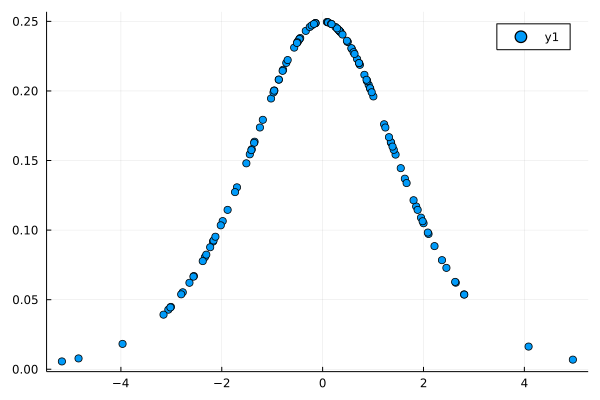

In [95]:
plot(x, pdf(dist, x), seriestype = :scatter)

┌ Info: Saved animation to 
│   fn = /home/beegass/Documents/Coding/central-limit-theorem/gifs/Distribution-Logistic{Float64}(μ=0.0, θ=1.0)-Samples.gif
└ @ Plots /home/beegass/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/beegass/Documents/Coding/central-limit-theorem/gifs/Distribution-Logistic{Float64}(μ=0.0, θ=1.0)-Samples.gif")
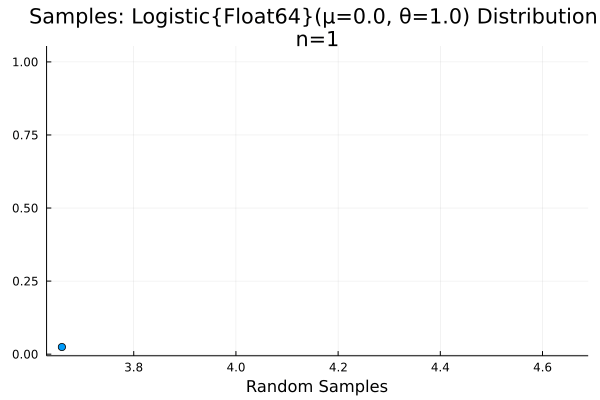

In [96]:
x, μ, σ = central_limit_theorem(n, dist);
means, vars = get_normals(x)
anim = @animate for i = 1:n
    plot(x[1:i], pdf(dist, x[1:i]), seriestype = :scatter, xlabel="Random Samples", title=("Samples: $(dist) Distribution \nn="*string(i)), lab=nothing)
end

if gifbool
    gif(anim, "gifs/Distribution-$(dist)-Samples.gif", fps = gif_fps);
else
    display(gif(anim));
end

┌ Info: Saved animation to 
│   fn = /home/beegass/Documents/Coding/central-limit-theorem/gifs/Mean-Distribution-Logistic{Float64}(μ=0.0, θ=1.0)-Samples.gif
└ @ Plots /home/beegass/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/beegass/Documents/Coding/central-limit-theorem/gifs/Mean-Distribution-Logistic{Float64}(μ=0.0, θ=1.0)-Samples.gif")
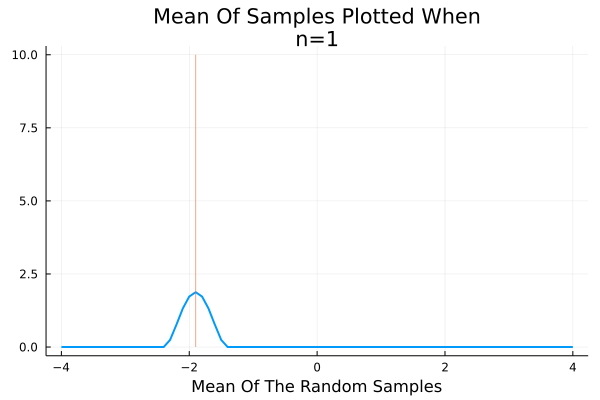

In [97]:
x, μ, σ = central_limit_theorem(n, dist);
means, vars = get_normals(x)
anim = @animate for i = 1:n
    o = ash(means[1:i]; rng = -4:.1:4, m=M)
    plot(o, xlabel="Mean Of The Random Samples", title=("Mean Of Samples Plotted When\nn="*string(i)), lab=nothing)
end

if gifbool
    gif(anim, "gifs/Mean-Distribution-$(dist)-Samples.gif", fps = gif_fps);
else
    display(gif(anim));
end

┌ Info: Saved animation to 
│   fn = /home/beegass/Documents/Coding/central-limit-theorem/gifs/Var-Distribution-Logistic{Float64}(μ=0.0, θ=1.0)-Samples.gif
└ @ Plots /home/beegass/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/beegass/Documents/Coding/central-limit-theorem/gifs/Var-Distribution-Logistic{Float64}(μ=0.0, θ=1.0)-Samples.gif")
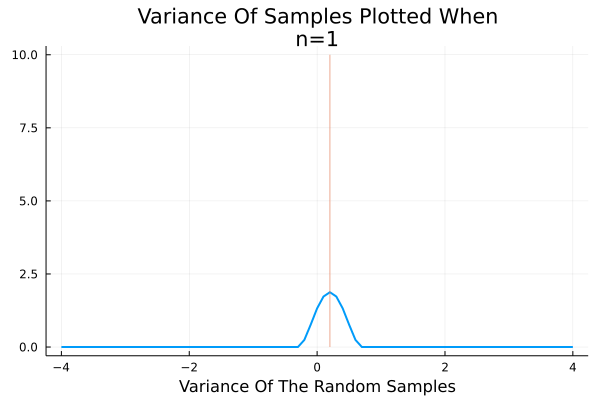

In [98]:
x, μ, σ = central_limit_theorem(n, dist);
means, vars = get_normals(x)
anim = @animate for i = 1:(n-1)
    o = ash(vars[1:i]; rng = -4:.1:4, m=M)
    plot(o, xlabel="Variance Of The Random Samples", title=("Variance Of Samples Plotted When\nn="*string(i)), lab=nothing)
end

if gifbool
    gif(anim, "gifs/Var-Distribution-$(dist)-Samples.gif", fps = gif_fps);
else
    display(gif(anim));
end